In [1]:
using Plots
using IJulia
using LinearAlgebra

gr() # Plots.GRBackend()

Plots.GRBackend()

In [2]:
mutable struct Vehicle
    P::Array{Float64,1}
    θ::Float64
    L::Float64
    W::Float64
    function Vehicle(x, y, θ, L, W)
        new([x; y], θ, L, W)
    end
end

In [3]:
function plotVehicle(ve::Vehicle)
    Rot(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)];
    points = [-ve.L/2 -ve.L/2 +ve.L/2 +ve.L/2;
              -ve.W/2 +ve.W/2 +ve.W/2 -ve.W/2]
    # rotate
    points = Rot(ve.θ) * points
    # translate
    points += [ve.P[1]*ones(size(points)[2])'; ve.P[2]*ones(size(points)[2])']

    points = hcat(points, [points[1,1]; points[2,1]])
    plot!(points[1,:], points[2,:])
    plot!(points[1,3:4], points[2,3:4], c=:red)
end

plotVehicle (generic function with 1 method)

In [4]:
function getVehicle(ve::Vehicle)
    Rot(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)];
    points = [-ve.L/2 -ve.L/2 +ve.L/2 +ve.L/2;
              -ve.W/2 +ve.W/2 +ve.W/2 -ve.W/2]
    # rotate
    points = Rot(ve.θ) * points
    # translate
    points += [ve.P[1]*ones(size(points)[2])'; ve.P[2]*ones(size(points)[2])']

    points = hcat(points, [points[1,1]; points[2,1]])
end

getVehicle (generic function with 1 method)

In [5]:
function updateVehicle(ve::Vehicle, s::Float64, θ::Float64)
    Rot(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)];
    d = s*[cos(ve.θ); sin(ve.θ)]
    d = Rot(θ)*d
    ve.P += d
    ve.θ += θ
end

updateVehicle (generic function with 1 method)

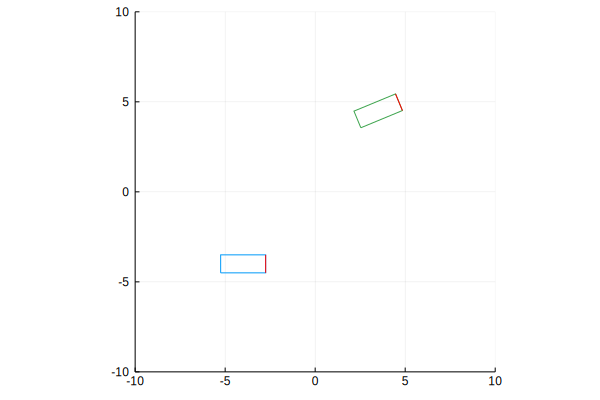

In [6]:
plot()
vehicle1 = Vehicle(-4,-4,0*π/4,2.5,1)
vehicle2 = Vehicle(3.5,4.5,1*π/8,2.5,1)

plotVehicle(vehicle1)
plotVehicle(vehicle2)
plot!(lims = (-10, 10), aspect_ratio=:equal, legend = false)

In [7]:
seg = getVehicle(vehicle1)

2×5 Array{Float64,2}:
 -5.25  -5.25  -2.75  -2.75  -5.25
 -4.5   -3.5   -3.5   -4.5   -4.5 

In [8]:
function Cart2Pol(x::Array)
    r = sqrt.(x[1,:].^2+x[2,:].^2)
    ϕ = atan.(x[2,:], x[1,:])
    ϕ, r
end

Cart2Pol (generic function with 1 method)

In [9]:
pol = Cart2Pol(seg)

([-2.4329663814621227, -2.5535900500422257, -2.2367655641740063, -2.119345729245425, -2.4329663814621227], [6.914658342969665, 6.309714732061981, 4.451123453691214, 5.273755777432247, 6.914658342969665])

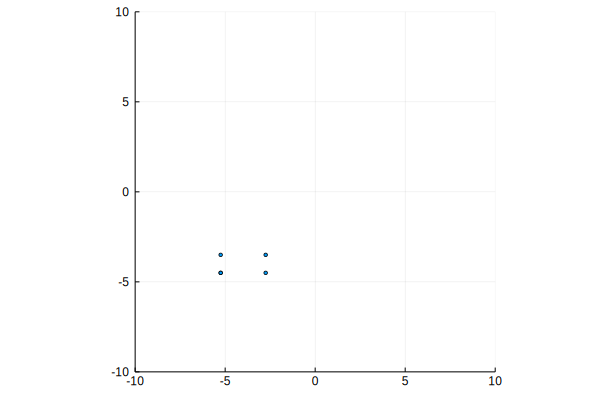

In [10]:
x = pol[2].*cos.(pol[1])
y = pol[2].*sin.(pol[1])
scatter(x,y, m=2)
plot!(lims = (-10, 10), aspect_ratio=:equal, legend = false)

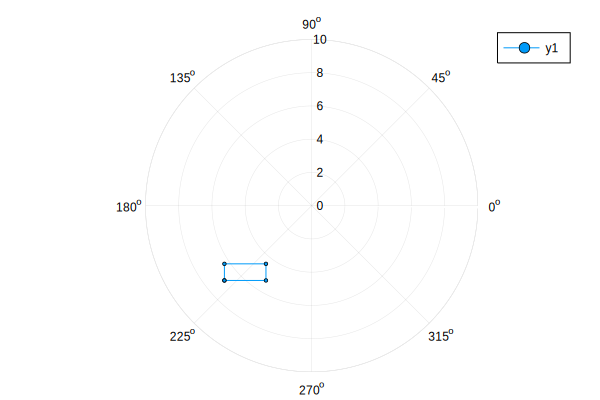

In [11]:
plot(lims = (0, 10), pol, proj=:polar, m=2)

In [12]:
θ = collect(range(-π, length=32, stop=π));
d= 5
ϕ = 0
r=(d./sin.(θ.-ϕ))
x = r.*cos.(θ)
y = r.*sin.(θ);

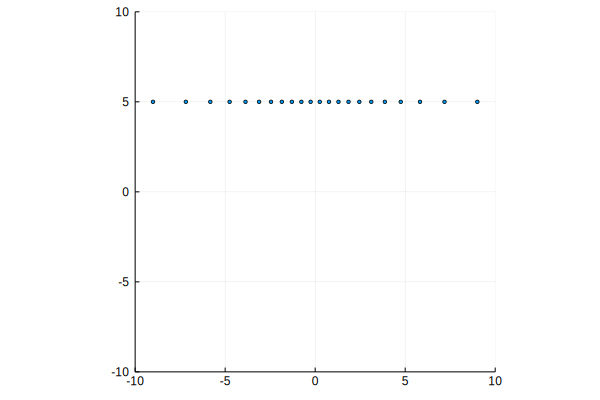

In [13]:
scatter(x,y,m=2)
plot!(lims = (-10, 10), aspect_ratio=:equal, legend = false)

In [14]:
θ = collect(range(-π, length=64, stop=π))
seg = [-1 -1; 1 -1]
Δ = seg[:,1]-seg[:,2]
pol = Cart2Pol(seg)
d = abs(det(seg))/norm(Δ)
Δ = seg[:,1]-seg[:,2]

2-element Array{Int64,1}:
 0
 2

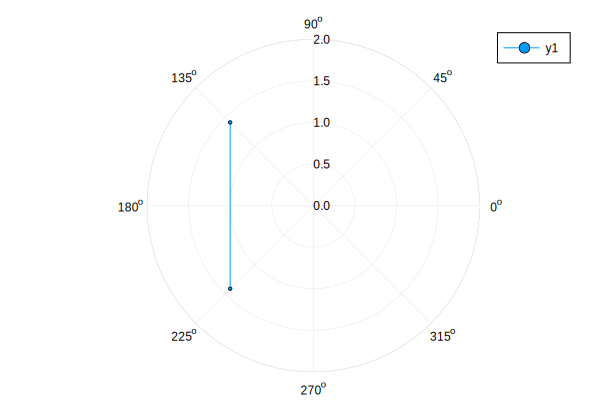

In [15]:
plot(lims = (0, 2), pol, proj=:polar, m=2)

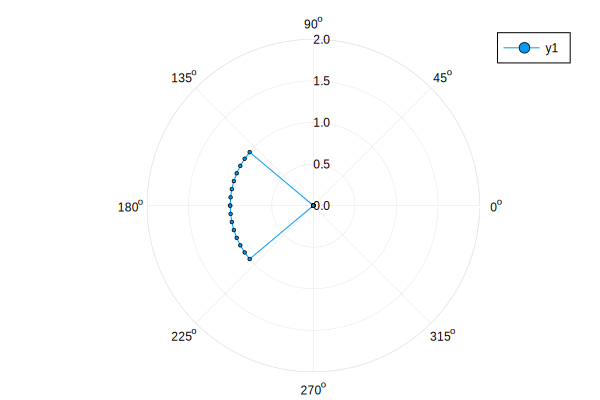

In [16]:
df = rem2pi((pol[1][2]-pol[1][1]), RoundNearest)
s = sign(df)
θr = s*rem2pi.(df*ones(length(θ)), RoundNearest)
θd = s*rem2pi.(θ.-pol[1][1]*ones(length(θ)), RoundNearest)
t = (θd.>=0) .& (θd.<=θr)
plot(lims = (0, 2), θ, t, proj=:polar, m=2)

In [17]:
x=Inf*ones(8)

8-element Array{Float64,1}:
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

In [18]:
edges = getVehicle(vehicle1)

2×5 Array{Float64,2}:
 -5.25  -5.25  -2.75  -2.75  -5.25
 -4.5   -3.5   -3.5   -4.5   -4.5 

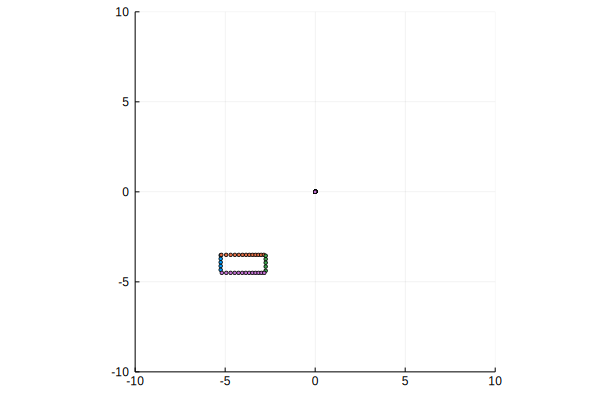

In [19]:
θ = collect(range(-π, length=256, stop=π))
plot()
for i in 1:2:length(edges)-2
    seg = [edges[i] edges[i+2]; edges[i+1] edges[i+3]]
    Δ = seg[:,1]-seg[:,2]
    # d = abs(det(seg))/norm(Δ)
    # not using abs
    d = det(seg)/norm(Δ)
    ϕ  = atan(Δ[2], Δ[1])
    pol = Cart2Pol(seg)
    df = rem2pi((pol[1][2]-pol[1][1]), RoundNearest)
    # keep the sign of df
    s = sign(df)
    θr = s*rem2pi.(df*ones(length(θ)), RoundNearest)
    θd = s*rem2pi.(θ.-pol[1][1]*ones(length(θ)), RoundNearest)
    t = (θd.>=0) .& (θd.<=θr)
    # r = p/cos(θ-ϕ), where ϕ is ortogonal to the line, then use sin
    r = t.*d./sin.(θ.-ϕ)
    scatter!(r.*cos.(θ), r.*sin.(θ), m=2)
    # scatter!(seg[1,:], seg[2,:], m=4)
end
plot!(lims = (-10, 10), aspect_ratio=:equal, legend = false)


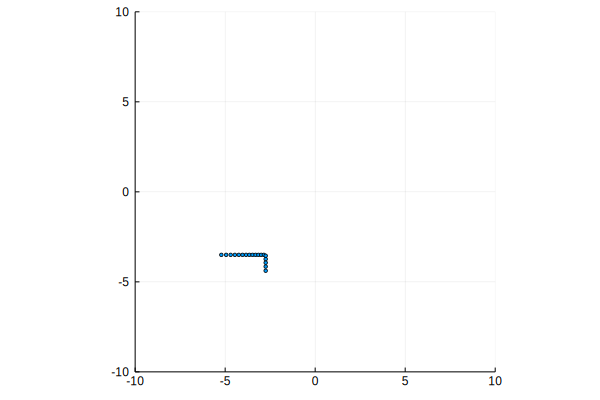

In [20]:
θ = collect(range(-π, length=256, stop=π))
plot()
r=Inf*ones(length(θ))
for i in 1:2:length(edges)-2
    seg = [edges[i] edges[i+2]; edges[i+1] edges[i+3]]
    Δ = seg[:,1]-seg[:,2]
    # d = abs(det(seg))/norm(Δ)
    # not using abs
    d = det(seg)/norm(Δ)
    ϕ  = atan(Δ[2], Δ[1])
    pol = Cart2Pol(seg)
    df = rem2pi((pol[1][2]-pol[1][1]), RoundNearest)
    # keep the sign of df
    s = sign(df)
    θr = s*rem2pi.(df*ones(length(θ)), RoundNearest)
    θd = s*rem2pi.(θ.-pol[1][1]*ones(length(θ)), RoundNearest)
    t = (θd.>=0) .& (θd.<=θr)
    # r = p/cos(θ-ϕ), where ϕ is ortogonal to the line, then use sin
    r = min.(r, (1.0./t).*d./sin.(θ.-ϕ))
    # scatter!(r.*cos.(θ), r.*sin.(θ), m=2)
    # scatter!(seg[1,:], seg[2,:], m=4)
end
scatter!(r.*cos.(θ), r.*sin.(θ), m=2)
plot!(lims = (-10, 10), aspect_ratio=:equal, legend = false)

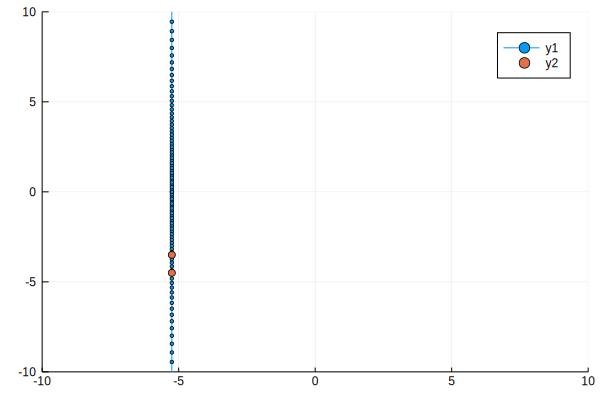

In [21]:
θ = collect(range(-π, length=128, stop=π));
seg = [-5.25  -5.25; -4.5   -3.5]
pol = Cart2Pol(seg)
Δ = seg[:,1]-seg[:,2]
# d = abs(det(seg))/norm(Δ)
d = (det(seg))/norm(Δ)
ϕ  = atan(Δ[2], Δ[1])
r = (d./sin.(θ.-ϕ))
plot(lims = (-10, 10), r.*cos.(θ), r.*sin.(θ), m=2)
scatter!(seg[1,:], seg[2,:], m=4)

In [22]:
θ = collect(range(-π, length=8, stop=π))

8-element Array{Float64,1}:
 -3.141592653589793 
 -2.243994752564138 
 -1.3463968515384828
 -0.4487989505128276
  0.4487989505128276
  1.3463968515384828
  2.243994752564138 
  3.141592653589793 

In [23]:
1.0./(θ.>0)

8-element Array{Float64,1}:
 Inf  
 Inf  
 Inf  
 Inf  
   1.0
   1.0
   1.0
   1.0